# Задача 1. Разведочный анализ

## Набор данных

Для выполнения задания использовался набор данных [World Weather Repository (34 версия)](https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/versions/34)

Признаки:
- `country` --- страна с данными о погоде
- `location_name` --- название местоположения (город)
- `latitude` --- широта
- `longitude` --- долгота
- `timezone` -- часовой пояс
- `last_updated_epoch` --- Unix-метка времени последнего обновления данных
- `last_updated` --- местное время последнего обновления данных
- `temperature_celsius` --- температура в градусах Цельсия
- `temperature_fahrenheit` --- температура в градусах Фаренгейта
- `condition_text` --- описание погодных условий
- `wind_mph` --- скорость ветра в милях в час
- `wind_kph` --- скорость ветра в километрах в час
- `wind_degree` --- направление ветра в градусах
- `wind_direction` --- направление ветра в виде 16-точечного компаса
- `pressure_mb` --- давление в миллибарах
- `pressure_in` --- давление в дюймах
- `precip_mm` --- количество осадков в миллиметрах
- `precip_in` --- количество осадков в дюймах
- `humidity` --- влажность в процентах
- `cloud` --- облачность в процентах
- `feels_like_celsius` --- ощущаемая температура в градусах Цельсия
- `feels_like_fahrenheit` --- ощущаемая температура в градусах Фаренгейта
- `visibility_km` --- видимость в километрах
- `visibility_miles` --- видимость в милях
- `uv_index` --- ультрафиолетовый индекс
- `gust_mph` --- порывы ветра в милях в час
- `gust_kph` --- порывы ветра в километрах в час
- `air_quality_Carbon_Monoxide` --- индекс качества воздуха: угарный газ
- `air_quality_Ozone` --- индекс качества воздуха: озон
- `air_quality_Nitrogen_dioxide` --- индекс качества воздуха: диоксид азота
- `air_quality_Sulphur_dioxide` --- индекс качества воздуха: диоксид серы
- `air_quality_PM2.5` --- индекс качества воздуха: PM2.5
- `air_quality_PM10` --- индекс качества воздуха: PM10
- `air_quality_us-epa-index` --- индекс качества воздуха: индекс US EPA
- `air_quality_gb-defra-index` --- индекс качества воздуха: индекс GB DEFRA
- `sunrise` --- местное время восхода солнца
- `sunset` --- местное время заката солнца
- `moonrise` --- местное время восхода луны
- `moonset` --- местное время заката луны
- `moon_phase` --- текущая фаза луны
- `moon_illumination` --- процентное освещение луны

Установка зависимостей и импорты

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install cartopy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

Чтение набора данных и первые $5$ строк для примера:

In [13]:
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


## Задача предсказания

Целевым признаком в задаче предсказания будет выступать разница между ощущаемой (`feels_like_celsius`) и фактической (`temperature_celsius`) температурой в градусах Цельсия.

In [14]:
df['feel_temperature_diff_celsius'] = df['feels_like_celsius'] - df['temperature_celsius']

## Чистка данных

В столбцах `moonrise` и `moonset` пропущено примерно $3\%$ значений (пропущенные значения отмечены соответственно `"No moonrise"` и `"No moonset`"), причём для каждой записи хотя бы один из этих двух признаков не пропущен.

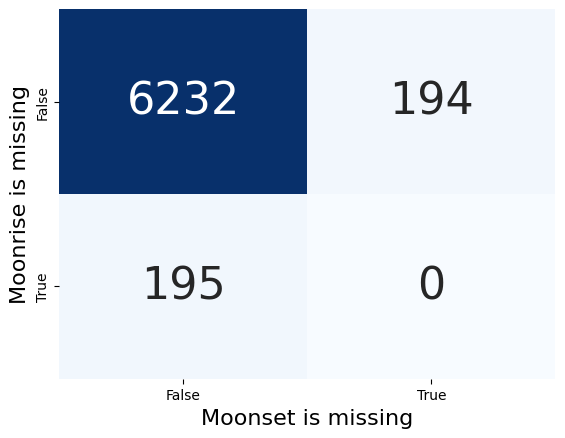

In [15]:
missing_moon_crosstab = pd.crosstab(df['moonrise'] == 'No moonrise', df['moonset'] == 'No moonset')
ax = sns.heatmap(missing_moon_crosstab,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 32})
ax.set_xlabel('Moonset is missing', fontsize=16)
ax.set_ylabel('Moonrise is missing', fontsize=16)

plt.show()

Анализ предметной области показал, что это может быть вызвано:
* Произведением наблюдений за полярным кругом (этот вариант был исключён, так тогда были бы пропущены оба признака)
* Тем, что время между последовательными восходами/заходами Луны чуть больше $24$ часов из-за чего Луна, например, может взойти в `23:50` $1$ сентября и после этого взойти следующий раз только в `00:38` $3$ сентября, ни разу не взойдя $2$ сентября.

С учётом второго объяснения, пропущенные восходы и заходы луны были заменены соответственно на `00:01` и `23:59`.

In [16]:
df['moonrise'] = df['moonrise'].replace('No moonrise', '12:01 AM')
df['moonset'] = df['moonset'].replace('No moonset', '11:59 PM')

Также стоит отметить, что в наборе данных нет пропущенных восходов и заходов Солнца и других пропущенных значений.

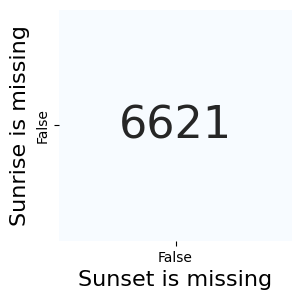

In [17]:
missing_moon_crosstab = pd.crosstab(df['sunrise'] == 'No sunrise', df['sunset'] == 'No sunset')
plt.figure(figsize=(3, 3))
ax = sns.heatmap(missing_moon_crosstab,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 32})
ax.set_xlabel('Sunset is missing', fontsize=16)
ax.set_ylabel('Sunrise is missing', fontsize=16)

plt.show()

In [18]:
print("NaN count:", df.isnull().sum().sum())

NaN count: 0


## Преобразование признаков

Преобразование категориального признака `moon_phase` в числовой.

In [19]:
moon_phase_mapping = {
    'New Moon': 0,
    'Waxing Crescent': 1,
    'First Quarter': 2,
    'Waxing Gibbous': 3,
    'Full Moon': 4,
    'Waning Gibbous': 5,
    'Last Quarter': 6,
    'Waning Crescent': 7
}

df['moon_phase'] = df['moon_phase'].map(moon_phase_mapping)

Парсинг дат и времени.

In [20]:
df['last_updated'] = df['last_updated'].apply(lambda time_str: datetime.strptime(time_str, "%Y-%m-%d %H:%M"))
for am_pm_column in ["sunrise", "sunset", "moonrise", "moonset"]:
  df[am_pm_column] = df[am_pm_column].apply(lambda time_str: datetime.strptime(time_str, "%I:%M %p"))
  df[am_pm_column] = df[am_pm_column].dt.hour + df[am_pm_column].dt.minute / 60

Добавление нового признака `last_updated_hour_of_day` (время в часах, без даты), так как экспертиза в предметной области позволяет предполагать, что этот признак может быть полезен при решении задачи предсказания.

Также можно было бы добавить признак `last_updated_day_of_year`, но так как все данные были записаны в пределах одного года этого решено было не делать.

In [21]:
df['last_updated_hour_of_day'] = df['last_updated'].dt.hour + df['last_updated'].dt.minute / 60

Удаление категориальных признаков описывающих местоположение, так как местоположение уже однозначно определённо количественными признаками, а именно: долготой и широтой.

In [22]:
df = df.drop(columns=['country', 'location_name', 'timezone'])  # recoverable from `latitude` and `longitude`

Удаление признака `last_updated`, так как время теперь описывается новым признаком `last_updated_hour_of_day`, а дата ранее существовавшим признаком `last_updated_epoch`.

In [23]:
df = df.drop(columns=['last_updated'])

Удаление признаков, дублирующих другие количественные признаки, которые отличаются только единицами измерения.

In [24]:
df = df.drop(columns=[
    'temperature_fahrenheit', # duplicate of temperature_celsius
    'wind_mph', # duplicate of wind_kmh
    'wind_direction', # duplicate of wind_degree
    'pressure_in', # duplicate of pressure_mb
    'precip_in', # duplicate of precip_mm
    'feels_like_fahrenheit', # duplicate of feels_like_celsius
    'visibility_miles', # duplicate of visibility_km
    'gust_mph', # duplicate of gust_kmh
])

Удаление категориального признака, дублирующего остальные в текстовой форме.

In [25]:
df = df.drop(columns=['condition_text'])

Удаление признаков, которые не должны оказывать прямого влияние на ощущение температуры.

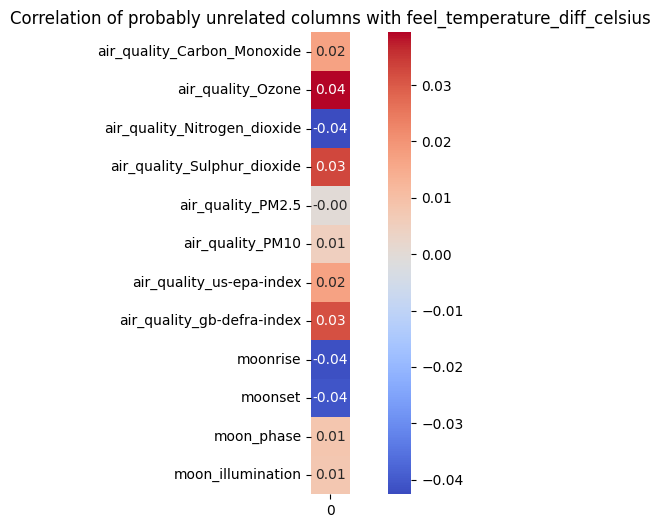

In [27]:
prefixes = ['air_quality', 'moon']
probably_unrelated_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in prefixes)]

selected_columns = df[probably_unrelated_columns]

correlation_matrix = selected_columns.corrwith(df['feel_temperature_diff_celsius'])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
plt.title('Correlation of probably unrelated columns with feel_temperature_diff_celsius')
plt.show()

In [28]:
df = df.drop(columns = probably_unrelated_columns)

## Анализ признаков

### Гистограмма целевого признака `feel_temperature_diff_celsius`

Заметим, что большинство значений сосредоточено на интервале $(-5, 5)$. Будем в дальнейшем использовать этот интервал для назначения цветов температуре в тех графиках, на которых температура обозначается цветом.

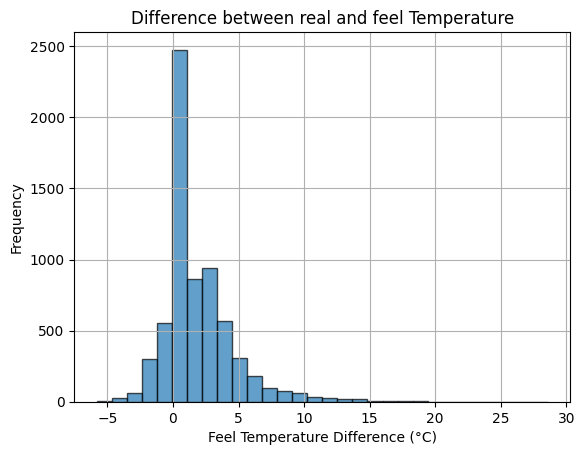

In [ ]:
plt.hist(df['feel_temperature_diff_celsius'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Feel Temperature Difference (°C)')
plt.ylabel('Frequency')
plt.title('Difference between real and feel Temperature')
plt.grid(True)
plt.show()

### Зависимость разницы между ощущаемой и фактической температурой от фактической температуры

Заметим, что по мере повышения температуры разница между ощущаемой и фактической температурой тоже растет.

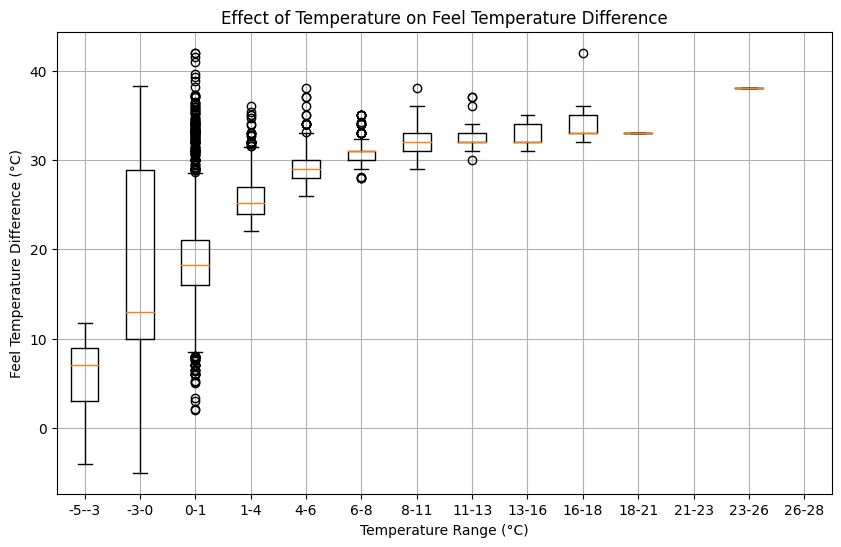

In [ ]:
bins = np.linspace(df['feel_temperature_diff_celsius'].min(), df['feel_temperature_diff_celsius'].max(), 15)

boxplot_data = [df.loc[(df['feel_temperature_diff_celsius'] >= bins[i]) & (df['feel_temperature_diff_celsius'] < bins[i+1])]['temperature_celsius'].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)])
plt.title('Effect of Temperature on Feel Temperature Difference')
plt.ylabel('Feel Temperature Difference (°C)')
plt.xlabel('Temperature Range (°C)')
plt.grid(True)

plt.show()

### Зависимость разницы между ощущаемой и фактической температурой от географических координат

Четкой зависимости разницы между ощущаемой и фактической температурой от географических координат не выявлено, но можно заметить, что в районе экватора и в тропиках южного полушария ощущаемая температура обычно выше фактической.

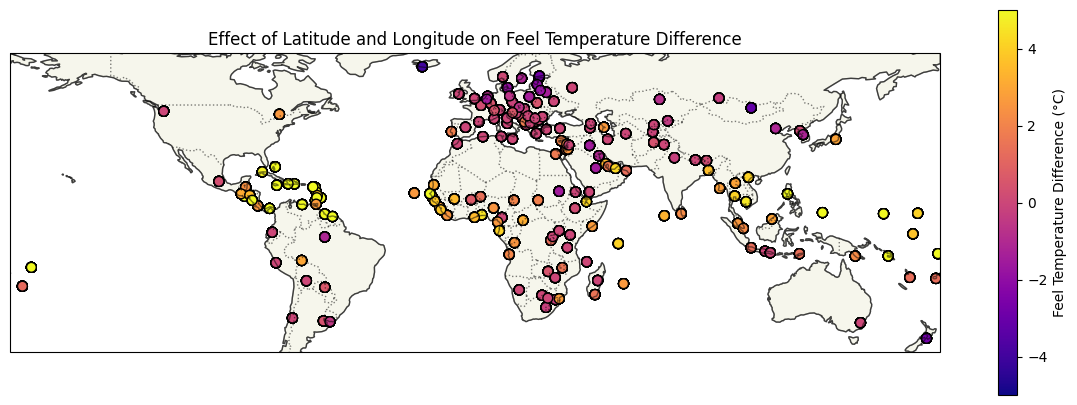

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.5)

scatter = ax.scatter(
    df['longitude'],
    df['latitude'],
    c=df['feel_temperature_diff_celsius'],
    cmap='plasma',
    s=50,
    edgecolors='k',
    transform=ccrs.PlateCarree()
)

scatter.set_clim(-5, 5)

cbar = plt.colorbar(scatter)
cbar.set_label('Feel Temperature Difference (°C)')

plt.title('Effect of Latitude and Longitude on Feel Temperature Difference')
plt.grid(True)

plt.show()

### Зависимость разницы между ощущаемой и фактической температурой от даты и времени наблюдения

Влияния даты на разницу между ощущаемой и фактической температурой не обнаружено, возможно, это обусловлено тем, что набор данных содержит только наблюдения за период с $29$ августа $2023$ по $30$ сентября $2023$.

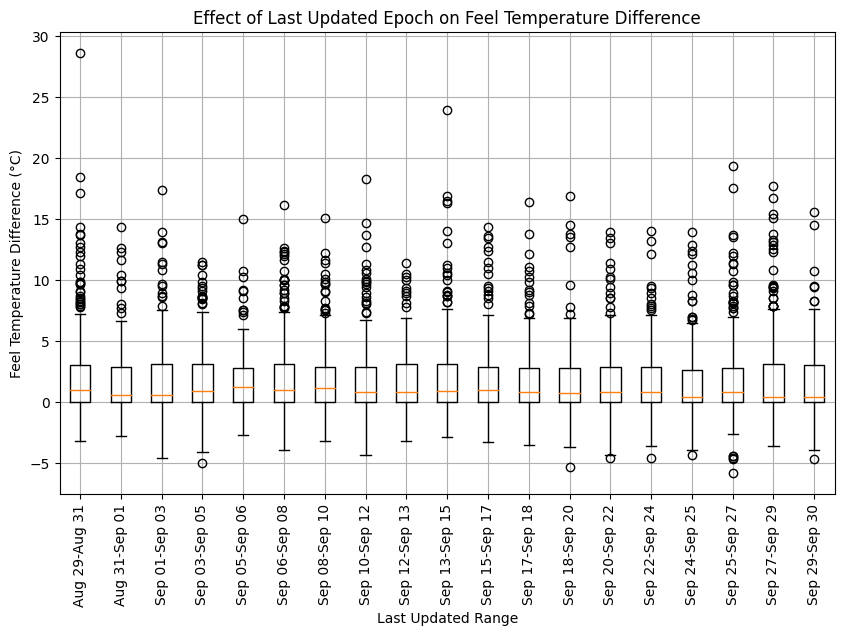

In [32]:
bins = np.linspace(df['last_updated_epoch'].min(), df['last_updated_epoch'].max(), 20)

boxplot_data = [df.loc[(df['last_updated_epoch'] >= bins[i]) & (df['last_updated_epoch'] < bins[i+1])]['feel_temperature_diff_celsius'].values
               for i in range(len(bins) - 1)]

def to_day_of_year(epoch_time):
  return datetime.utcfromtimestamp(epoch_time).strftime('%b %d')

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{to_day_of_year(bins[i])}-{to_day_of_year(bins[i+1])}' for i in range(len(bins) - 1)])
plt.title('Effect of Last Updated Epoch on Feel Temperature Difference')
plt.xlabel('Last Updated Range')
plt.ylabel('Feel Temperature Difference (°C)')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

Также заметим наличие зависимости между новым признаком `last_updated_hour_of_day` (время в часах, без даты) и разницей между ощущаемой и фактической температурой: днём эта разница больше, чем ночью.

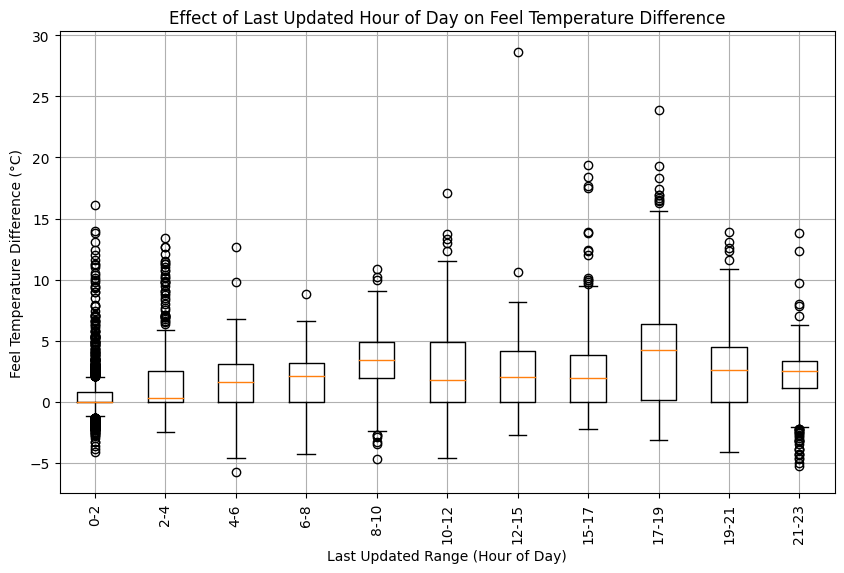

In [ ]:
bins = np.linspace(df['last_updated_hour_of_day'].min(), df['last_updated_hour_of_day'].max(), 12)

boxplot_data = [df.loc[(df['last_updated_hour_of_day'] >= bins[i]) & (df['last_updated_hour_of_day'] < bins[i+1])]['feel_temperature_diff_celsius'].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)])
plt.title('Effect of Last Updated Hour of Day on Feel Temperature Difference')
plt.xlabel('Last Updated Range (Hour of Day)')
plt.ylabel('Feel Temperature Difference (°C)')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

### Зависимость разницы между ощущаемой и фактической температурой от скорости ветра

Заметим, что при наиболее больших значениях скорости ветра ощущаемая температура часто ниже фактической.

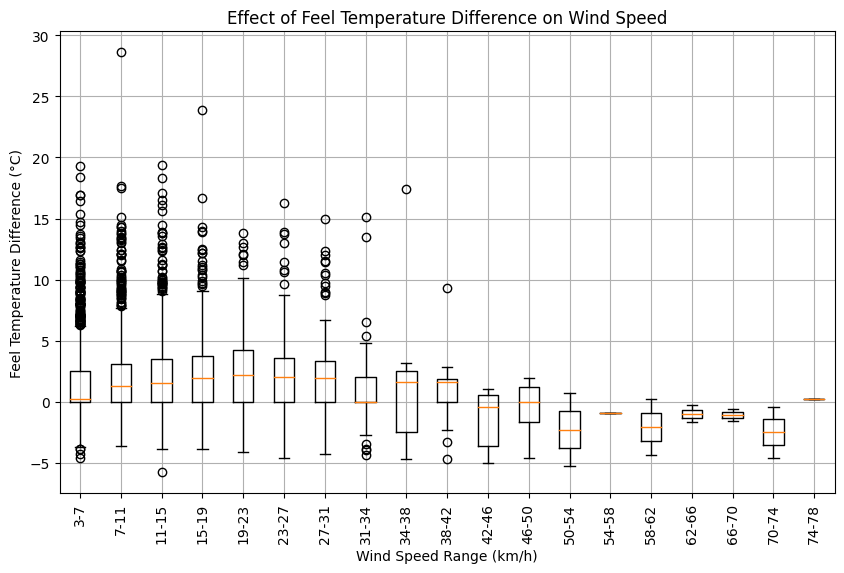

In [ ]:
bins = np.linspace(df['wind_kph'].min(), df['wind_kph'].max(), 20)

boxplot_data = [df.loc[(df['wind_kph'] >= bins[i]) & (df['wind_kph'] < bins[i+1])]['feel_temperature_diff_celsius'].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)])
plt.title('Effect of Feel Temperature Difference on Wind Speed')
plt.xlabel('Wind Speed Range (km/h)')
plt.ylabel('Feel Temperature Difference (°C)')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

### Зависимость разницы между ощущаемой и фактической температурой от влажности

Заметим, что при увеличении влажности разница между ощущаемой и фактической температурой в целом растёт.

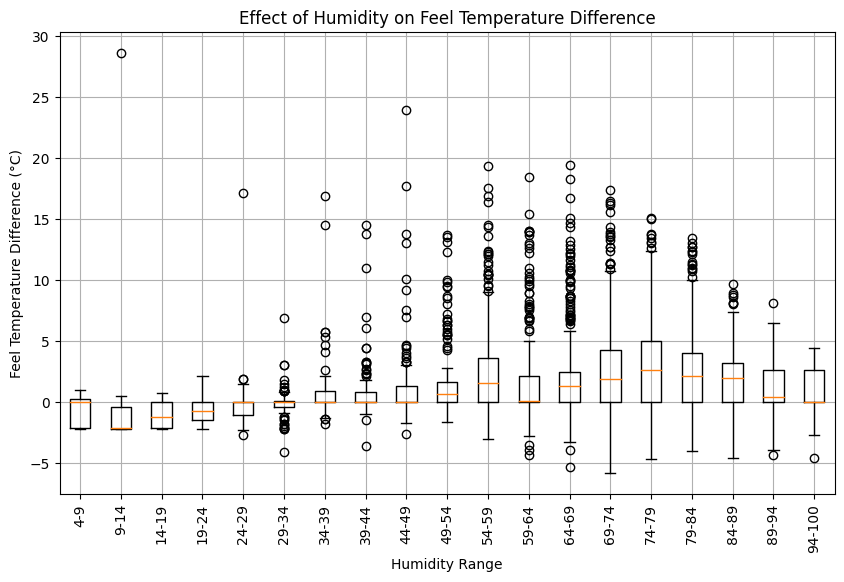

In [ ]:
bins = np.linspace(df['humidity'].min(), df['humidity'].max(), 20)

boxplot_data = [df.loc[(df['humidity'] >= bins[i]) & (df['humidity'] < bins[i+1])]['feel_temperature_diff_celsius'].values
               for i in range(len(bins) - 1)]

plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=[f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)])
plt.title('Effect of Humidity on Feel Temperature Difference')
plt.xlabel('Humidity Range')
plt.ylabel('Feel Temperature Difference (°C)')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

## Корреляция всех количественных признаков

Матрица корреляции показывает, что разница между ощущаемой и фактической температурой ещё коррелирует с атмосферным давлением (возможно, это вызвано связью высоты над уровнем моря и давления), облачностью, индексом ультрафиолета и временем восхода и заката Солнца.

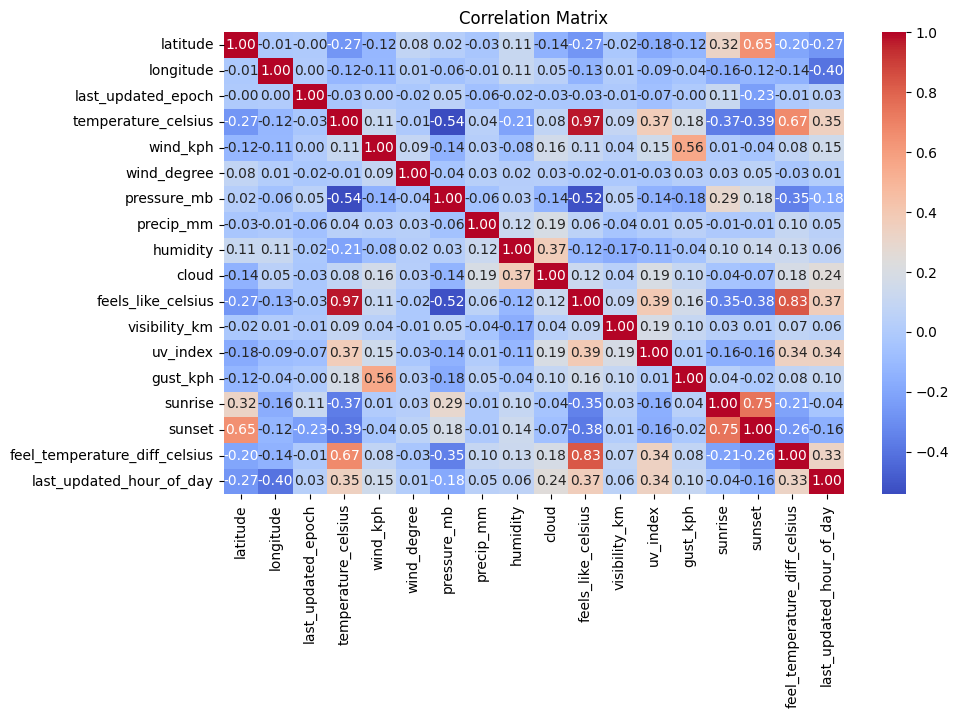

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Также перед решением задачи предсказания `feel_temperature_diff_celsius` не забудем удалить признак `feels_like_celsius`, так для вычисления `feels_like_celsius` требуется знать значение `feel_temperature_diff_celsius`.

In [ ]:
df = df.drop(columns=['feels_like_celsius'])